In [26]:
import pandas as pd
import numpy as np
import random as rand

In [27]:
df=pd.read_csv('file.csv',header=None)
df.head()

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [28]:
all_vals=df.values.tolist()
type(all_vals)

list

In [29]:
def random_centroids(all_vals, K):    
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = all_vals[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [30]:
centroids=random_centroids(all_vals,3)
centroids

[[0.992532455, 5.015674238],
 [4.184500107, 0.453562031],
 [2.26901428, 4.618188828]]

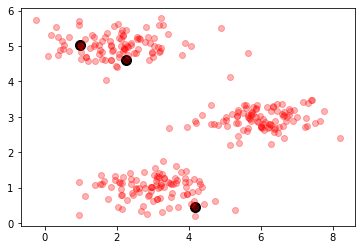

In [65]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.array(centroids)[:, 0],np.array(centroids)[:, 1], color='black', s=100)
plt.scatter(np.array(all_vals)[:, 0], np.array(all_vals)[:, 1], c='r', alpha=0.3)
plt.show()

In [66]:
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)
        
        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

In [67]:
assignments=assign_cluster(all_vals,centroids)
assignments

[2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [68]:
len(all_vals)

300

In [69]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

In [70]:
new_centroid=new_centroids(all_vals,centroids,assignments,3)
new_centroid

[array([0.97820711, 5.04987929]),
 array([4.51808962, 1.94503148]),
 array([2.6619378 , 4.94431268])]

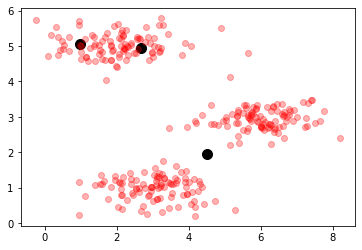

In [72]:
plt.figure()
plt.scatter(np.array(new_centroid)[:, 0],np.array(new_centroid)[:, 1], color='black', s=100)
plt.scatter(np.array(all_vals)[:, 0], np.array(all_vals)[:, 1], c='r', alpha=0.3)
plt.show()

In [73]:
centroid = centroids[assignments[0]]
centroid

[2.26901428, 4.618188828]

In [74]:
def sse(all_vals, assignments, centroids):
    errors = []
    
    for i in range(len(all_vals)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]
    
        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))
        
        #append squared error to the list of error
        errors.append(error**2)
        
    #and sum up all the errors
    sse = sum(errors)
    
    return sse

In [75]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []
    
    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)

   
    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)
        
        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)
        
        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, it)

In [76]:
result = kmeans_clustering(all_vals,K=3)

In [77]:
result

([2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,


In [78]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))] 
centroids_y = [result[1][x][1] for x in range(len(result[1]))] 
centroids_x
centroids_y

[3.00052511179, 1.0154104079411768, 5.025570059408164]

In [79]:
x = np.array(all_vals)[:, 0]
y = np.array(all_vals)[:, 1]
assignments = result[0]

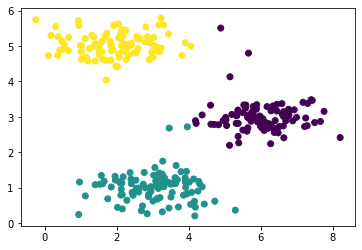

In [80]:
plt.scatter(x, y, c=assignments)

Text(0, 0.5, 'Y')

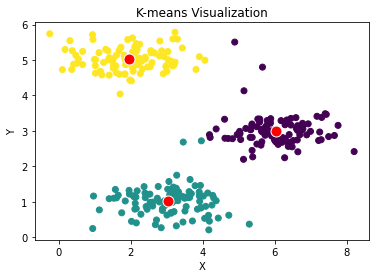

In [82]:
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)

plt.title("K-means Visualization")
plt.xlabel("X")
plt.ylabel("Y")